In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

data = pd.read_csv('50_Startups.csv')

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,0.00,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              46 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [3]:
processed_data = pd.concat([pd.get_dummies(data.State),
                    data.iloc[:,[0,1,2,4]] ], axis=1)

In [4]:
processed_data.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,0.00,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [5]:
features = processed_data.iloc[:,0:6].values

label = processed_data.iloc[:,[6]].values.ravel()




In [6]:
# For loop to check ideal sample that will give generalized model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for i in range(1,51):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=i)
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    train_score=model.score(X_train,y_train)
    test_score=model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Test: {} Train: {} RandomState: {}".format(test_score,train_score,i))
        
    

Test: 0.8097263426032031 Train: 0.797231096743134 RandomState: 2
Test: 0.8959766656795188 Train: 0.7880926602858058 RandomState: 3
Test: 0.8402698269097915 Train: 0.780446287044702 RandomState: 8
Test: 0.9390176810746278 Train: 0.7846437539440524 RandomState: 11
Test: 0.891998622408836 Train: 0.7926879197048586 RandomState: 13
Test: 0.9446177096863309 Train: 0.7716993966315873 RandomState: 14
Test: 0.8524449638694336 Train: 0.8040039891300119 RandomState: 17
Test: 0.8276402153607211 Train: 0.8089286100527618 RandomState: 19
Test: 0.9261646218256181 Train: 0.7820139158108166 RandomState: 20
Test: 0.842100808278273 Train: 0.8046857512769819 RandomState: 22
Test: 0.9538612584335553 Train: 0.7949545626271313 RandomState: 24
Test: 0.8801065750508924 Train: 0.8144157710368692 RandomState: 28
Test: 0.9464191803480805 Train: 0.7704160310115667 RandomState: 29
Test: 0.9330139630322405 Train: 0.7734330010789383 RandomState: 31
Test: 0.8461658869317468 Train: 0.7979526004322949 RandomState: 32
Te

In [7]:
# For loop to check ideal sample that will give generalized model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=24)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
model.score(X_train,y_train)

0.7949545626271313

In [9]:
model.score(X_test,y_test)

0.9538612584335553

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))

0.9538612584335554

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,model.predict(X_test))

51589804.13037676

In [12]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,model.predict(X_test))

6089.207213765835

In [13]:
model.coef_

array([-1.71125060e+03,  3.19885036e+03, -2.29324065e+03,  6.58481134e-01,
        5.79331690e-02,  5.47695827e-02])

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge

In [16]:
X_selected = SelectKBest(f_regression, k=6).fit_transform(features, label)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, label, test_size=0.50, random_state=42)
#Tune Alpha
#prepare scoring lists
fitscores = []
predictscores = []
#prepare a log spaced list of alpha values to test
alphas = np.logspace(-1, 4, num=25)
#Iterate through alphas and fit with Ridge Regression
for alpha in alphas:
    estimator = Ridge(alpha = alpha)
    estimator.fit(X_train,y_train)
    fitscores.append(estimator.score(X_train,y_train))
    predictscores.append(estimator.score(X_test,y_test))

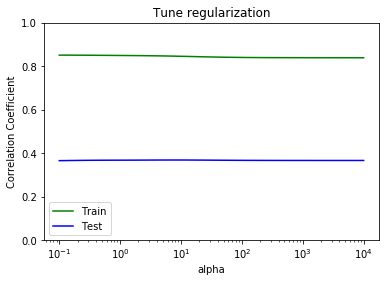

In [20]:
#make a plot
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, fitscores,'g', label = 'Train')
ax.plot(alphas, predictscores,'b', label = 'Test')
#Set limits and titles
plt.ylim([0,1])
plt.xlabel('alpha')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.title('Tune regularization')
plt.savefig('Tuning.png')
plt.show()
 

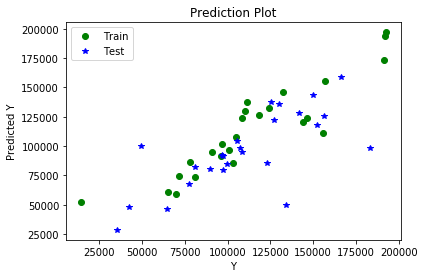

In [22]:
ridgeEstimator = Ridge(alpha = 45)
ridgeEstimator.fit(X_train,y_train)
ridgeEstimator.score(X_train,y_train)
ridgeEstimator.score(X_test,y_test)
plt.plot(y_train,ridgeEstimator.predict(X_train),'go', label = 'Train')
plt.plot(y_test,ridgeEstimator.predict(X_test),'b*', label = 'Test')
plt.legend()
plt.xlabel('Y')
plt.ylabel('Predicted Y')
plt.title('Prediction Plot')

plt.savefig('Prediction.png')
plt.show()